Title: **Predicting Newsletter Subscription based on Player Age, Experience and Hours Played**

Author: Helena Wu 

Student Number: 73311193

**Introduction**

The UBC Computer Science research team is running a Minecraft server to study how people interact within digital environments. To grow their research efforts, the team is interested in understanding what kinds of players are more likely to subscribe to their game-related newsletter. This insight will help them better target recruitment and engagement strategies. 

Research Question:
Can player characteristics and gameplay behaviour (such as experience level, playtime, age, and session activity) predict whether a player will subscribe to a game-related newsletter?

The analysis within this report uses two datasets:
`players.csv` and `sessions.csv`.

The `players.csv` dataset contains observations from 196 players and includes information such as name, hashed email, gender, age, experience level and whether the player subscribed.

**Variables within the players.csv dataset**:
  | Variable        | Type    | Description|
  |-----------------|---------|------------|
  | experience      | Categorical  | Player’s self-described skill level |
  | subscribe       | Logical      | If the player subscribed to the newsletter or not|
  | hashedEmail     | Character    | Player identifier |
  | played_hours    | Numeric      | Player’s total hours played |
  | name            | Character    | Player’s chosen in-game name |
  | gender          | Categorical  | Gender ( Male, Female, Other)|
  | Age             | Numeric      | Age in years |

The `sessions.csv` dataset contains 1535 play session records, such as start and end times.

**Variables within the sessions.csv dataset**:
  | Variable             | Type    | Description |
  |----------------------|---------|-------------|
  | hashedEmail          | Character  | Player identifier|
  | start_time           | Character  | Start timestamp|
  | end_time             | Character  | End timestamp|
  | original_start_time  | Numeric    | Start time in milliseconds|
  | original_end_time    | Numeric    | End time in milliseconds|


**Libraries To Load:**

In [3]:
#please run the code below to attach the following libraries
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Loading the Data:

In [4]:
players_data <- read_csv("data/players.csv") 
sessions_data <- read_csv("data/sessions.csv")

players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12


**Wrangling**

Processing the Data :
After loading the data, we can see the following issues within the data that need to be fixed/tidied:
- the 'hashedEmail' column should be removed to preserve anonymity (but is needed to join 'players.csv' and 'sessions.csv' tables together.
- some session_count observations data is missing (these are excluded from the analysis)
- Each value must have its own cell (`start_time` and `end_time`) have two values within, the date as well as time so it must be separated.

In [5]:
sessions_data_clean <- sessions_data |>
separate(start_time, into = c("start_date", "start_time"), sep = " ") |>
separate(end_time, into = c("end_date", "end_clock_time"), sep = " ") |>
  mutate(start_date = dmy(start_date),
    end_date = dmy(end_date)) |>
group_by(hashedEmail)

sessions_data_clean

hashedEmail,start_date,start_time,end_date,end_clock_time,original_start_time,original_end_time
<chr>,<date>,<chr>,<date>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30,18:12,2024-06-30,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17,23:33,2024-06-17,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25,17:34,2024-07-25,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25,03:22,2024-07-25,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25,16:01,2024-05-25,16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-10,23:01,2024-05-10,23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,2024-07-01,04:08,2024-07-01,04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28,15:36,2024-07-28,15:57,1.72218e+12,1.72218e+12




**Merging and Cleaning Player Data:**
- the `sessions_data_clean` and `players_data` datasets are merged
- `na`'s are dropped and not included within the dataset
- hashed_email and name is removed to remove player identifiers
- `original_start_time` and	`original_end_time` is removed and not used within the analysis because measurement units are unknown
- adjusted the `subscribe` column to answer either YES or NO (rather than TRUE or FALSE) for clarification
- Mutate subscribe to be a factor
- Mutate experience to a number (for the classification model)

In [6]:
merged_data <- players_data |>
left_join(sessions_data_clean, by = "hashedEmail") |>
clean_names() |>                                                           
drop_na(experience, subscribe, age, played_hours, experience) |>
filter(played_hours > 0) |>
  select(-hashed_email, -name, -original_start_time, -original_end_time) |>
mutate(subscribe = recode(as.character(subscribe), `TRUE` = "YES", `FALSE` = "NO"),
       subscribe = as_factor(subscribe),
       experience = factor(experience))

merged_data_adjusted <- merged_data |>
mutate(experience_adjusted = recode(experience, "Amateur" = 1,
                            "Beginner" = 2,
                               "Pro" = 3,
                              "Regular"= 4,
                             "Veteran" = 3)) 
merged_data_adjusted

experience,subscribe,played_hours,gender,age,start_date,start_time,end_date,end_clock_time,experience_adjusted
<fct>,<fct>,<dbl>,<chr>,<dbl>,<date>,<chr>,<date>,<chr>,<dbl>
Pro,YES,30.3,Male,9,2024-08-08,00:21,2024-08-08,01:35,3
Pro,YES,30.3,Male,9,2024-09-09,22:30,2024-09-09,22:37,3
Pro,YES,30.3,Male,9,2024-08-08,02:41,2024-08-08,03:25,3
Pro,YES,30.3,Male,9,2024-09-10,15:07,2024-09-10,15:29,3
Pro,YES,30.3,Male,9,2024-05-05,22:21,2024-05-05,23:17,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,NO,2.3,Male,17,2024-09-08,20:04,2024-09-08,22:02,1
Amateur,NO,2.3,Male,17,2024-08-23,21:59,2024-08-23,22:06,1
Amateur,NO,2.3,Male,17,2024-09-09,02:17,2024-09-09,02:45,1


**Data Analysis:** 
To analyze the data present within the dataset, three visualizations will be created to display the proportion of subscription by experience level, age, and hours played.

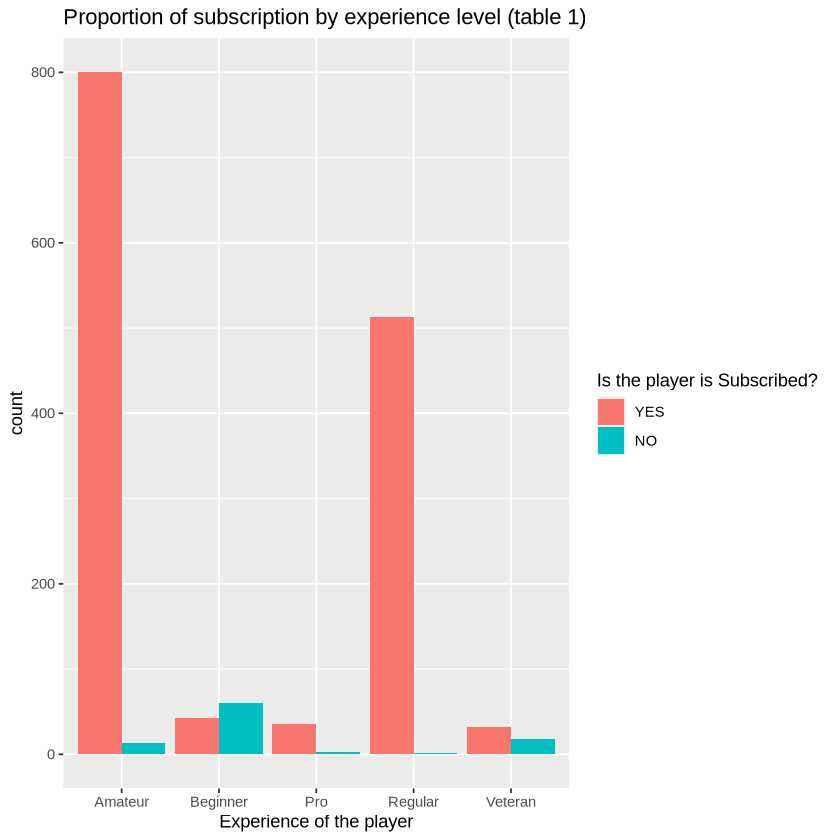

In [7]:
experience_plot <- merged_data |>
ggplot(aes(x=experience, fill = subscribe)) +
geom_bar(position = position_dodge()) +
labs(fill = "Is the player is Subscribed?") +
xlab("Experience of the player") + 
ggtitle("Proportion of subscription by experience level (figure 1)")

experience_plot

Figure 1: Proportion of subscription by experience level

From the table, we are able to see that most subscribers were either Amateurs or Regulars, but there were very few subscriptions among Beginners, Veterans and Pros. This table also suggests that Amateurs and Regulars are more likely to subscribe as the raw counts of subscribers are much higher but it could potentially be the result of their overrepresentation in the dataset. 

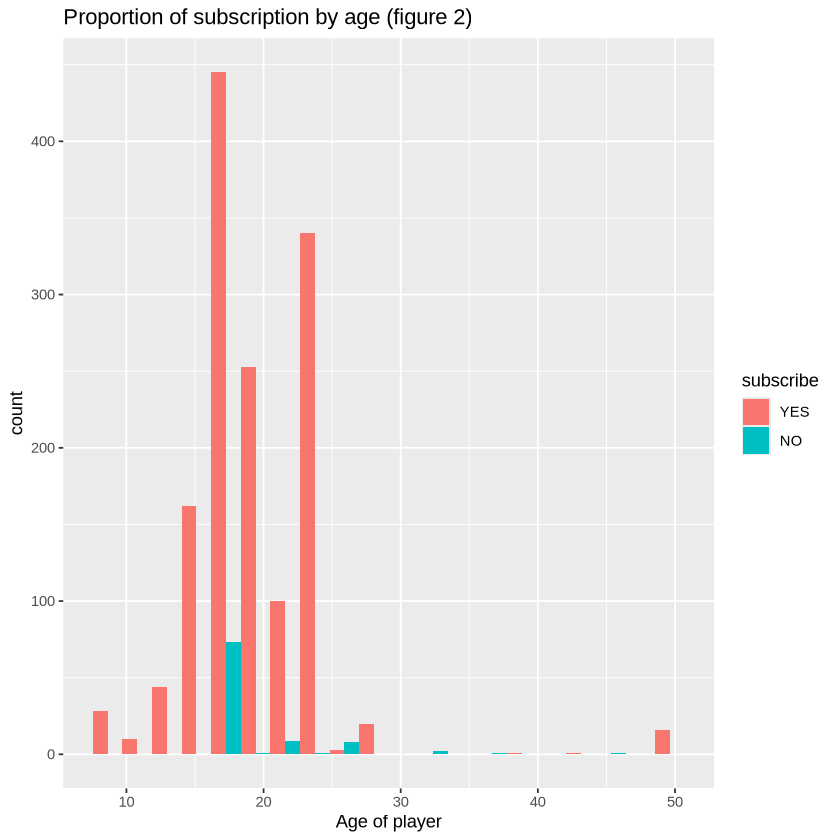

In [28]:
hours_played_plot <- ggplot(merged_data, aes(x = age, fill = subscribe)) +
geom_histogram(position = "dodge", bins = 20) +
xlab("Age of player") +
labs(color = "Is the player subscribed?") +
ggtitle("Proportion of subscription by age (figure 2)")
hours_played_plot

Figure 2: Proportion of subscription by age

From figure 2, the bar plot reveals that the majority of newsletter subscribers fall within the age range of approx 15-28 year old. Within this group, it is observed that there is a high number of subscriptions, potentially suggesting that younger players are more likely to engage and subscribe with the newsletter. However, there is a much less number of players above the age of 28, with almost no data for players aged between approximately 28 and 48. This lack of data makes it difficult to draw conclusions about the subscription behavior of older players and is unclear whether older individuals are genuinly less likely to subscribe, or if they are underrepresented within the sample.

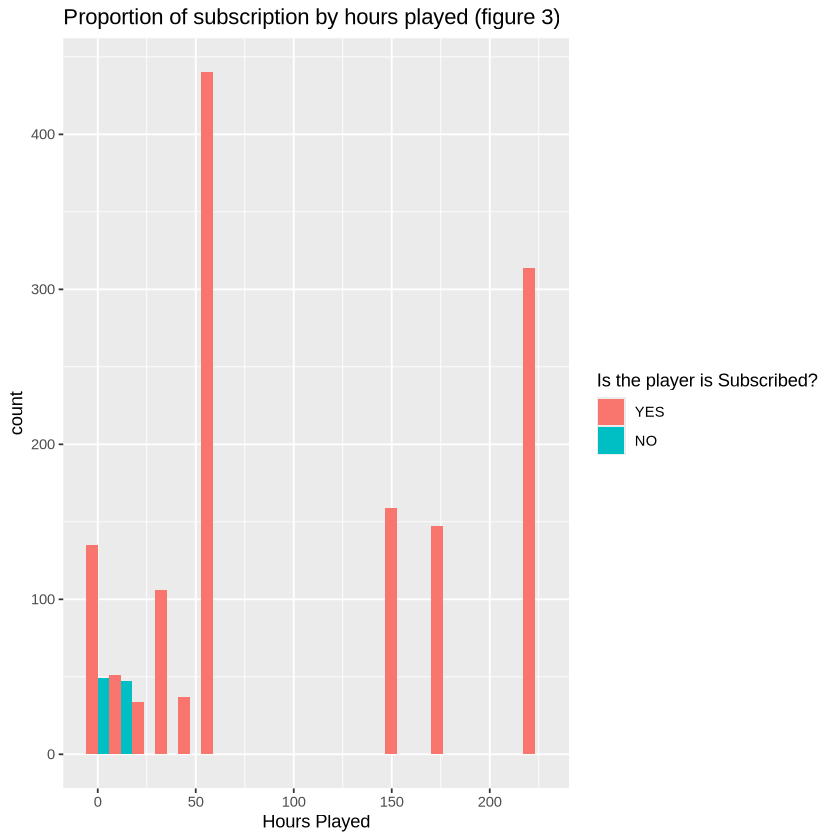

In [26]:
played_hours_plot <- merged_data |>
ggplot(aes(x=played_hours, fill = subscribe)) +
geom_histogram(position = "dodge", bins = 20) +
labs(fill = "Is the player is Subscribed?") +
xlab("Hours Played") + 
ggtitle("Proportion of subscription by hours played (figure 3)")

played_hours_plot

Table 3: Proportion of subscription by hours played

In table 3, we can see that players with lower playtime (0-25 hours) show a mix of subscribers and non-subscribers. However, this is the only range where unsubscribed players are visibly present in the data (suggesting that players that do not frequently play are less likely to subscribe). However, near the 50 hour mark, all players appear to be subscribers including a large spike at approx 65 hours and additional spikes at 150, 173, and 220 hours. There are no non-subscribers among the high hour players indicating that playtime is strongly associated with subscription behavior.



**Modelling with KNN Classification**

Using cross validation to test for K.

Choosing K:
By looking at the `accuracy_versus_k` plot, we can see that when K= approx 3, 5 or 6, the accuracy is the highest but declines after ~5.5 neighbors. For this report, K=5 will be used.

In [12]:
set.seed(1)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
      set_engine("kknn") |>
       set_mode("classification")

data_fit <- workflow() |>
add_recipe(data_recipe) |>
add_model(knn_spec) |>
fit(data= data_train)

data_test_predictions <- predict(data_fit, data_test) |>
bind_cols(data_test)

data_test_predictions

.pred_class,experience,subscribe,played_hours,gender,age,start_date,start_time,end_date,end_clock_time,experience_adjusted
<fct>,<fct>,<fct>,<dbl>,<chr>,<dbl>,<date>,<chr>,<date>,<chr>,<dbl>
YES,Pro,YES,30.3,Male,9,2024-09-09,22:30,2024-09-09,22:37,3
YES,Pro,YES,30.3,Male,9,2024-04-06,22:24,2024-04-06,23:33,3
YES,Pro,YES,30.3,Male,9,2024-08-03,02:30,2024-08-03,03:54,3
YES,Pro,YES,30.3,Male,9,2024-04-08,01:17,2024-04-08,01:43,3
YES,Pro,YES,30.3,Male,9,2024-09-09,22:51,2024-09-10,00:40,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YES,Amateur,YES,32.0,Male,22,2024-06-05,01:46,2024-06-05,01:52,1
YES,Amateur,YES,32.0,Male,22,2024-04-23,04:30,2024-04-23,04:58,1
YES,Regular,NO,0.1,Male,18,2024-06-29,21:05,2024-06-29,21:15,4


**Assessing the Model:**

Assessing the model is important to understand how well it functions and if it works with the data. It could also give us information on the data.

In [13]:
data_prediction_accuracy <- data_test_predictions |>
metrics(truth = subscribe, estimate = .pred_class)

data_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9763158
kap,binary,0.8175027


In [14]:
data_matrix <- data_test_predictions |>
conf_mat(truth = subscribe, estimate = .pred_class)

data_matrix

          Truth
Prediction YES  NO
       YES 349   3
       NO    6  22

The confusion matrix reveals that the model has high accuracy as it correctly classifyed 349 out of 355 subscribers and 22 out of 25 non-subscribers. However, the higher number of errors in predicting non-subscribers (6 false negatives and 3 false positives) displays a potential an imbalance in data. In the test data, there are significantly fewer non-subscribers than subscribers, which makes it harder for the model to learn meaningful patterns for that group. This issue is also displayed by the use of K-Nearest Neighbors (KNN) classification method. KNN relies on the proximity of similar data points to make predictions, but when there are no datapoints of non-subscribers or when less common player types are underrepresented, the model lacks sufficient "neighbors" to draw from therefore also less reliable. 

**Discussion**

The aim within this project was to predict if a player is subscribed to a game-related newsletter based on their behavior and characteristics. However, it was difficult to draw a completely reliable conclusion due to the gaps within the data sample. For example, there were very few to no players over the age of 25 and certain experience levels (such as "Veterans" and "Beginners") were heavily underrepresented. Due to these missing segments, it is possible that the sample is not accuratly reflecting the overall player population, potentially introducing bias and limiting the generalizability of the model. Additionally, the class imbalance between subscribers and non-subscribers also may have skewed the predictions (especially for the class with less).

Generally the results aligned with my expectations as I anticipated that players are more invested in the game (those who play more frequently, are younger and identify as more experienced) are more likely to subscribe. These assumptions were mostly supported by the visualizations (table 1, 2 and 3). However, this could also be a general trend that was displayed because majority of the sample were younger players ranging between 15 and 24. 

This analysis could potentially raise further questions involving playstyles such as "Can the playstyle of players (builder, collector, speedrunner, fighter) predict if a player is subscribed to the newsletter"? This question could offer insight to those managing/writing the newsletter know what type of content may be most engaging for players who read it.